In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data1=pd.read_csv('D:/Data Science/Assignment/05Multi linear regration/ToyotaCorolla.csv',encoding= 'unicode_escape')
data1.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


In [3]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                1436 non-null   int64 
 1   Model             1436 non-null   object
 2   Price             1436 non-null   int64 
 3   Age_08_04         1436 non-null   int64 
 4   Mfg_Month         1436 non-null   int64 
 5   Mfg_Year          1436 non-null   int64 
 6   KM                1436 non-null   int64 
 7   Fuel_Type         1436 non-null   object
 8   HP                1436 non-null   int64 
 9   Met_Color         1436 non-null   int64 
 10  Color             1436 non-null   object
 11  Automatic         1436 non-null   int64 
 12  cc                1436 non-null   int64 
 13  Doors             1436 non-null   int64 
 14  Cylinders         1436 non-null   int64 
 15  Gears             1436 non-null   int64 
 16  Quarterly_Tax     1436 non-null   int64 
 17  Weight        

In [4]:
#copy data
data=data1[["Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight","Price"]]

In [5]:
data.describe()

,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight,Price
count,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000
mean,55.947075,68533.259749,101.502089,1576.85585,4.033426,5.026462,87.122563,1072.45961,10730.824513
std,18.599988,37506.448872,14.981080,424.38677,0.952677,0.188510,41.128611,52.64112,3626.964585
min,1.000000,1.000000,69.000000,1300.00000,2.000000,3.000000,19.000000,1000.00000,4350.000000
25%,44.000000,43000.000000,90.000000,1400.00000,3.000000,5.000000,69.000000,1040.00000,8450.000000
50%,61.000000,63389.500000,110.000000,1600.00000,4.000000,5.000000,85.000000,1070.00000,9900.000000
75%,70.000000,87020.750000,110.000000,1600.00000,5.000000,5.000000,85.000000,1085.00000,11950.000000
max,80.000000,243000.000000,192.000000,16000.00000,5.000000,6.000000,283.000000,1615.00000,32500.000000


In [6]:
data.corr()

,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight,Price
Age_08_04,1.000000,0.505672,-0.156622,-0.098084,-0.148359,-0.005364,-0.198431,-0.470253,-0.876590
KM,0.505672,1.000000,-0.333538,0.102683,-0.036197,0.015023,0.278165,-0.028598,-0.569960
HP,-0.156622,-0.333538,1.000000,0.035856,0.092424,0.209477,-0.298432,0.089614,0.314990
cc,-0.098084,0.102683,0.035856,1.000000,0.079903,0.014629,0.306996,0.335637,0.126389
Doors,-0.148359,-0.036197,0.092424,0.079903,1.000000,-0.160141,0.109363,0.302618,0.185326
Gears,-0.005364,0.015023,0.209477,0.014629,-0.160141,1.000000,-0.005452,0.020613,0.063104
Quarterly_Tax,-0.198431,0.278165,-0.298432,0.306996,0.109363,-0.005452,1.000000,0.626134,0.219197
Weight,-0.470253,-0.028598,0.089614,0.335637,0.302618,0.020613,0.626134,1.000000,0.581198
Price,-0.876590,-0.569960,0.314990,0.126389,0.185326,0.063104,0.219197,0.581198,1.000000


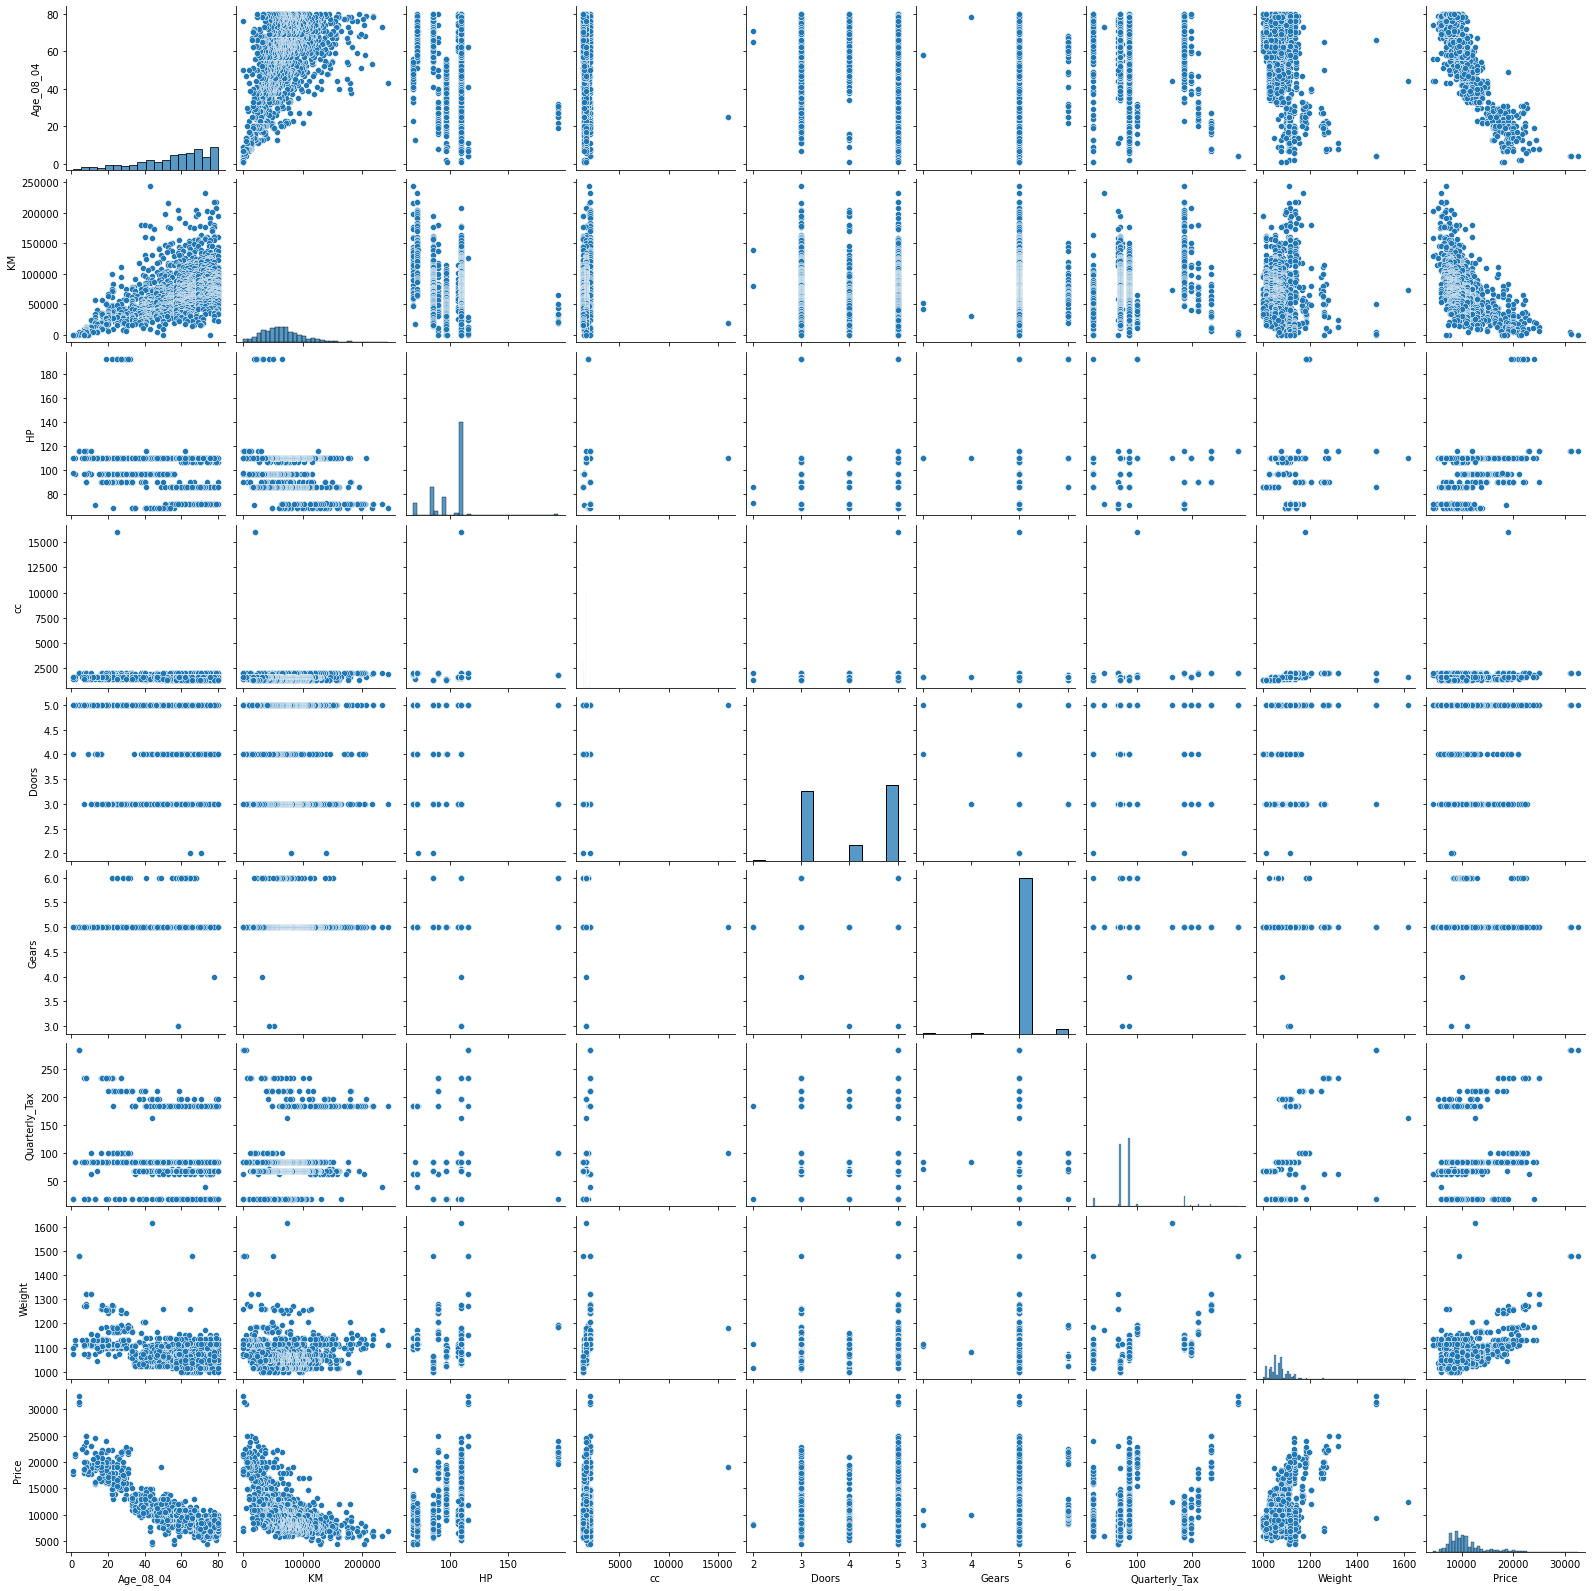

In [7]:
#pair plot
sns.pairplot(data)

In [8]:
x=data[['Age_08_04', 'KM', 'HP', 'cc', 'Doors', 'Gears', 'Quarterly_Tax',
       'Weight']]
y=data[['Price']]

C:\Users\PRATIK TRIVEDI\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age_08_04'>

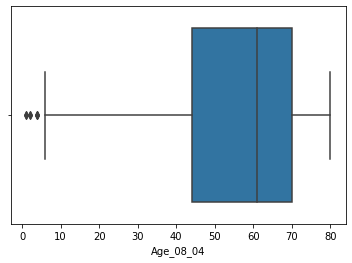

In [9]:
sns.boxplot(data['Age_08_04'])

C:\Users\PRATIK TRIVEDI\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='KM'>

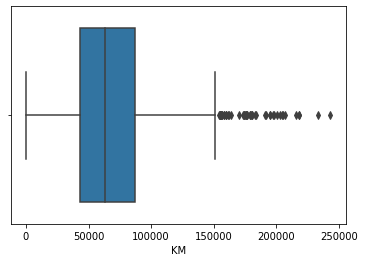

In [10]:
sns.boxplot(data['KM'])

C:\Users\PRATIK TRIVEDI\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='HP'>

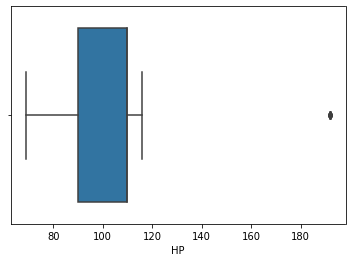

In [11]:
sns.boxplot(data['HP'])

C:\Users\PRATIK TRIVEDI\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='cc'>

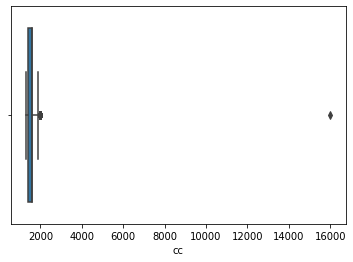

In [12]:
sns.boxplot(data['cc'])

C:\Users\PRATIK TRIVEDI\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Doors'>

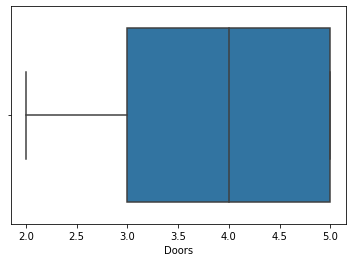

In [13]:
sns.boxplot(data['Doors'])

C:\Users\PRATIK TRIVEDI\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gears'>

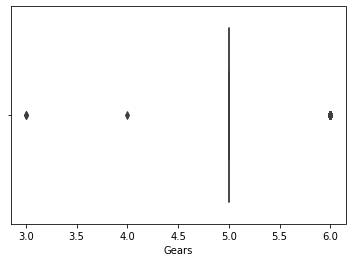

In [14]:
sns.boxplot(data['Gears'])

C:\Users\PRATIK TRIVEDI\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Quarterly_Tax'>

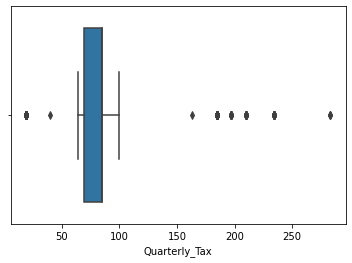

In [15]:
sns.boxplot(data['Quarterly_Tax'])

C:\Users\PRATIK TRIVEDI\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Weight'>

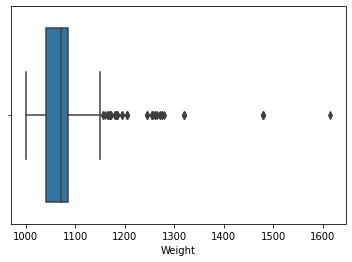

In [16]:
sns.boxplot(data['Weight'])

C:\Users\PRATIK TRIVEDI\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Price'>

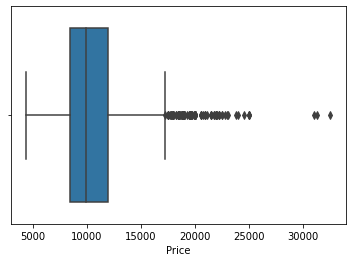

In [17]:
sns.boxplot(data['Price'])

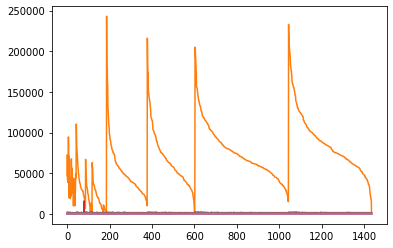

In [18]:
plt.plot(x)

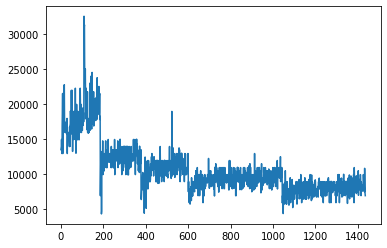

In [19]:
plt.plot(y)

In [20]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model

In [21]:
#train_test split
x_train,x_test,y_train, y_test= train_test_split(x,y,test_size=0.2,random_state=42)

In [22]:
#linear regression model
models=linear_model.LinearRegression()

In [23]:
models.fit(x_train,y_train)

LinearRegression()

In [24]:
models.coef_.round()

array([[-120.,   -0.,   29.,   -0.,    6.,  566.,    1.,   19.]])

In [25]:
#prediction
y_predict=models.predict(x_test)
y_predict

array([[11334.87722086],
       [ 8930.64945599],
       [ 9548.86462071],
       [ 8965.06576035],
       [10038.78235718],
       [ 7802.95638398],
       [ 8754.41363983],
       [ 8334.34227338],
       [14109.59893395],
       [13191.99921717],
       [ 9352.33990982],
       [ 9378.3801004 ],
       [12994.57748768],
       [13098.89251578],
       [ 9733.43058709],
       [ 8264.43003984],
       [12298.27553648],
       [17507.68271251],
       [ 7224.72741633],
       [ 9214.19715853],
       [12788.74204799],
       [17805.75966311],
       [ 7908.65782598],
       [10513.55219101],
       [ 7366.64403153],
       [15972.67442836],
       [ 9576.60128945],
       [ 7187.02006794],
       [15508.80065429],
       [14591.87579892],
       [ 8113.42063551],
       [ 9915.5628025 ],
       [ 8539.0292156 ],
       [10100.15393693],
       [10288.08205495],
       [ 8021.71758831],
       [ 8884.91657665],
       [ 9965.1815385 ],
       [16202.16611623],
       [ 9442.64885989],


In [26]:
models.score(x_test,y_test)

0.8538352805672252

In [27]:
import sklearn.metrics as sm

In [28]:
sm.mean_absolute_error(y_test,y_predict)

995.5863850096001

In [29]:
sm.mean_squared_error(y_test,y_predict)

1950244.987790427

In [30]:
sm.median_absolute_error(y_test,y_predict)

743.917586669013

In [31]:
y_test.shape

(288, 1)

In [32]:
y_test.head()

,Price
594,10800
754,9950
630,7500
1259,9250
903,9750


In [33]:
y_predict.shape

(288, 1)

In [34]:
sm.explained_variance_score(y_test,y_predict)

0.8540763134733668

In [35]:
from sklearn.metrics import r2_score

In [36]:
#r2 Score
r2_score(y_test,y_predict)

0.8538352805672252